# Problem Statement

## Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

## Objective

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

# Import Necessary Libraries

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
# loading the sparkling dataset from drive
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/TSF-Coded-2-Sparkling.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Understanding the Datasets

In [ ]:
# viewing the first 5 rows of the data
data.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [ ]:
# Viewing the last 5 rows of the data
data.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [ ]:
# Checking the shape of the data
data.shape

(187, 2)

In [ ]:
# Checking the structure and data types of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
# Checking the statistical Summary of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YearMonth,187,187,1980-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sparkling,187.0,NaN,NaN,NaN,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


In [ ]:
# Checking for missing Values
data.isnull().sum()

,0
YearMonth,0
Sparkling,0


Converting yearMonth column into DateTime format for Time Series Analysis

In [ ]:
# We are providing inputs to tell pandas that we are trying to work with time series.
data = pd.read_csv('/content/drive/My Drive/TSF-Coded-2-Sparkling.csv', parse_dates = ['YearMonth'])

In [ ]:
# We are providing inputs to tell pandas that we are trying to work with time series and making our time series reference as the index
data = pd.read_csv('/content/drive/My Drive/TSF-Coded-2-Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')
data.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


# Exploratory Data Analysis

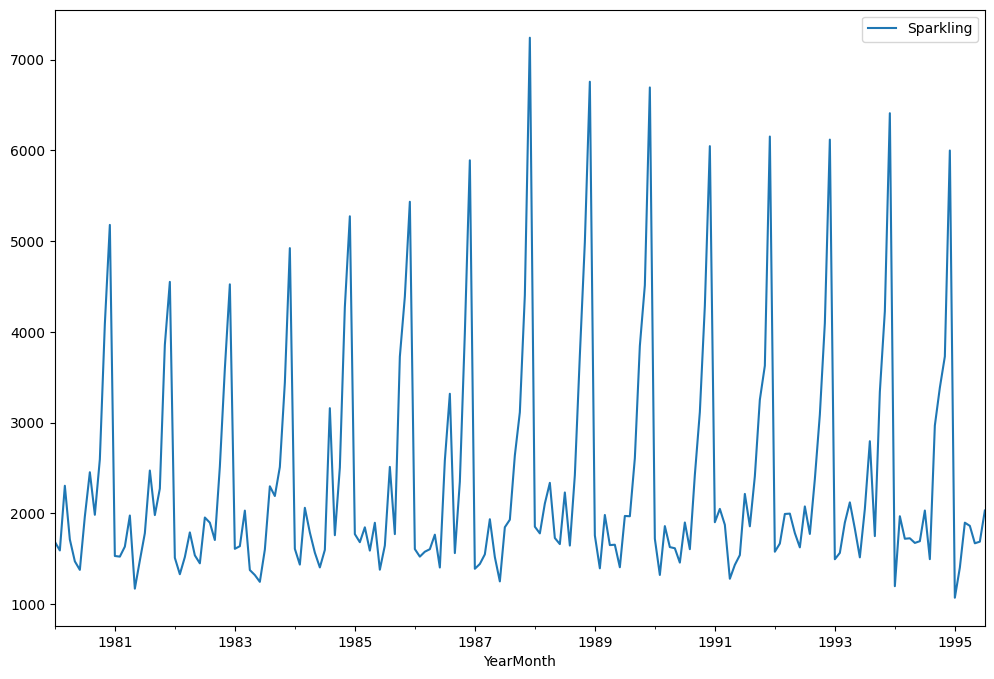

In [ ]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
data.plot()
plt.show()

**Trend:**

The general trend appears to be slightly increasing over time. While there is no sharp rise, the peaks seem to grow taller as the years progress.
Between 1981 and 1995, there is a gradual increase in the amplitude of the values, suggesting growth in the "Sparkling" metric over time.

**Seasonality:**

A clear seasonal pattern is present, with sharp peaks recurring at regular intervals, likely on an annual basis.
These peaks indicate specific times of the year when the "Sparkling" value is significantly higher, possibly corresponding to seasonal demand or production cycles.
The valleys between the peaks are consistent, further reinforcing the presence of strong seasonality.

In [ ]:
#We will resample the data to get values at a month-level from the day-level data by taking the average over the months.

data1 = data.resample('Q').mean()
data1.head()

,Sparkling
YearMonth,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000


In [ ]:
# Checking the shape of the data
data1.shape

(63, 1)

In [ ]:
# Check the Statistics of the data
data1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Sparkling,63.0,2398.486772,1129.511568,1313.333333,1624.833333,1913.333333,2342.666667,5161.666667


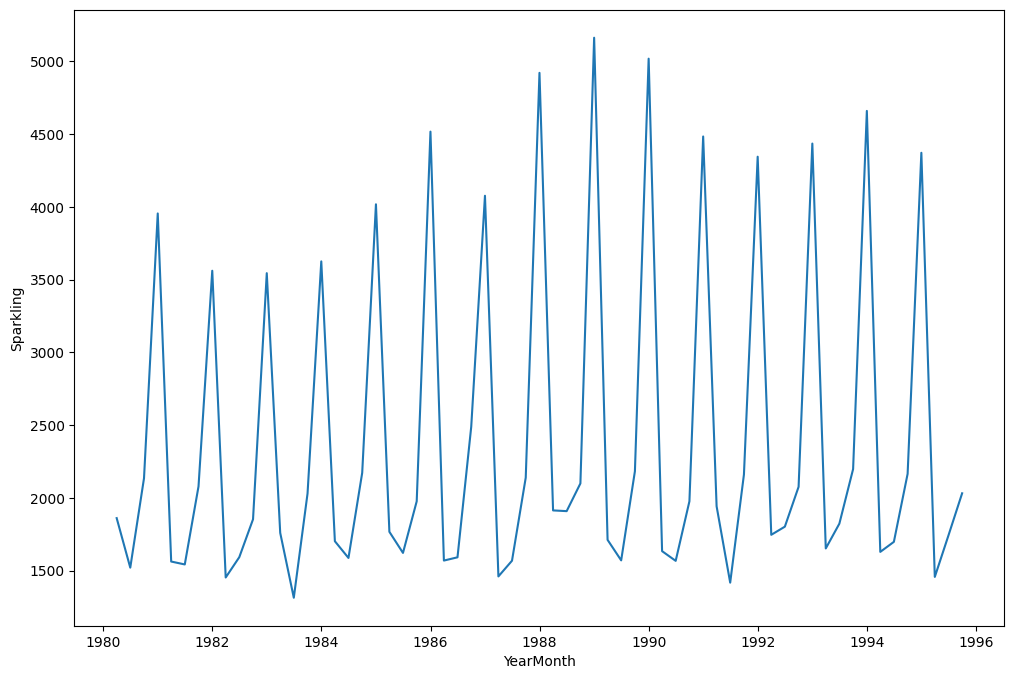

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data1, x=data1.index, y='Sparkling') # Trend of Sparkling wines at year level
plt.show()

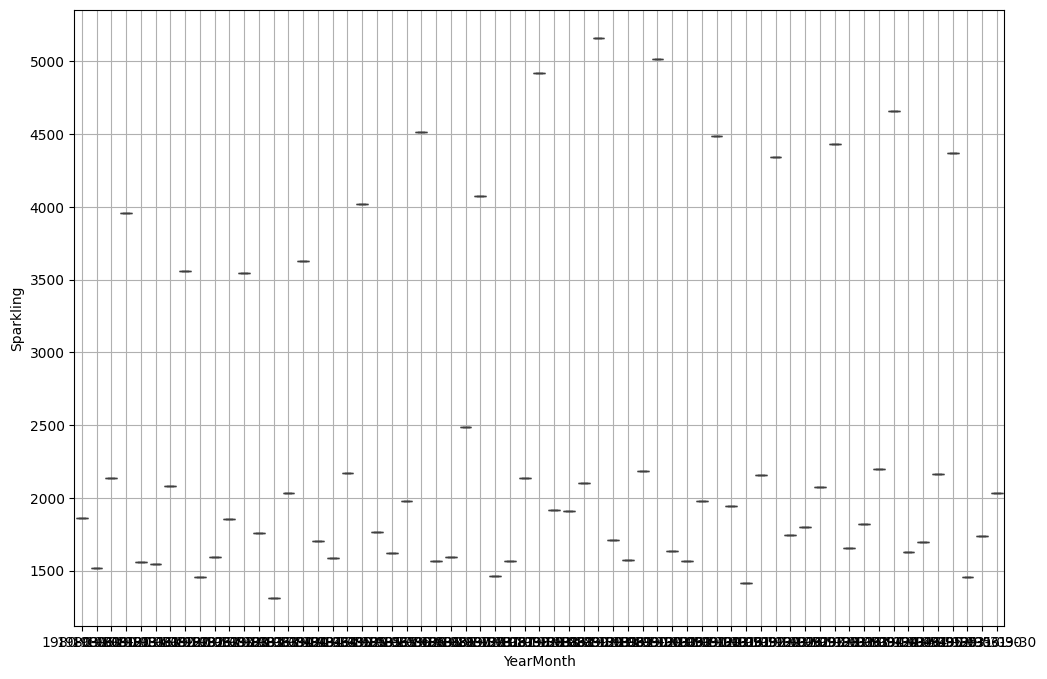

In [ ]:
# Boxplot at year level
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'YearMonth',y = 'Sparkling',data=data1)
plt.grid();

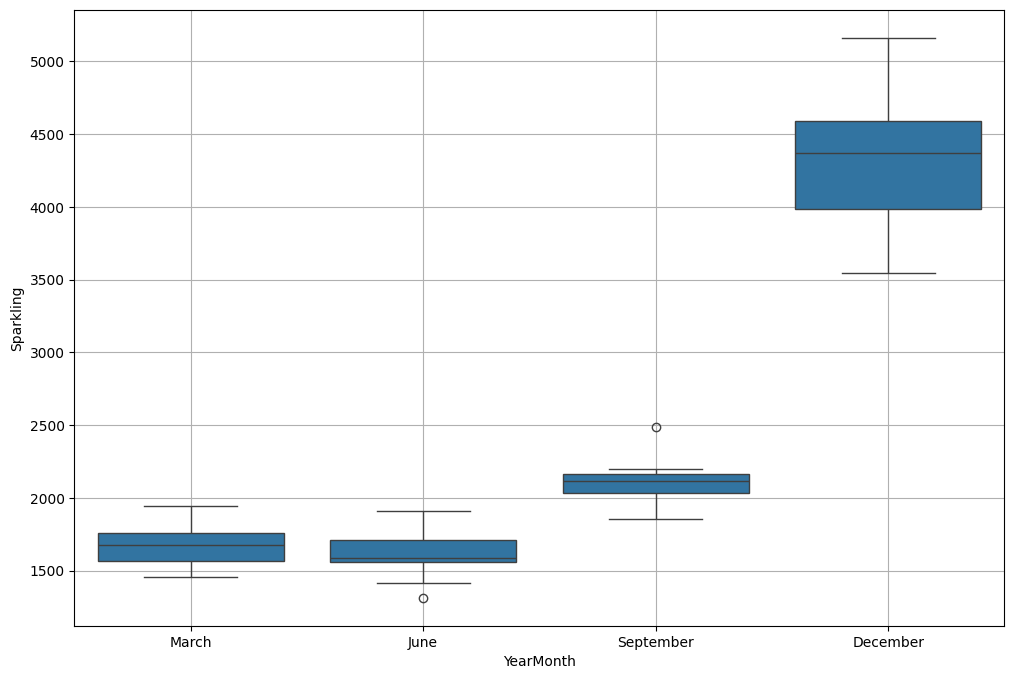

In [ ]:
# Boxplot at month level
plt.figure(figsize=(12, 8))
sns.boxplot(x = data1.index.month_name(),y = 'Sparkling',data=data1)
plt.grid();

In [ ]:
# Pivot table to display monthly Sparkling Sales across years

df = data.copy()
monthly_price_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_price_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


<Figure size 1500x800 with 0 Axes>

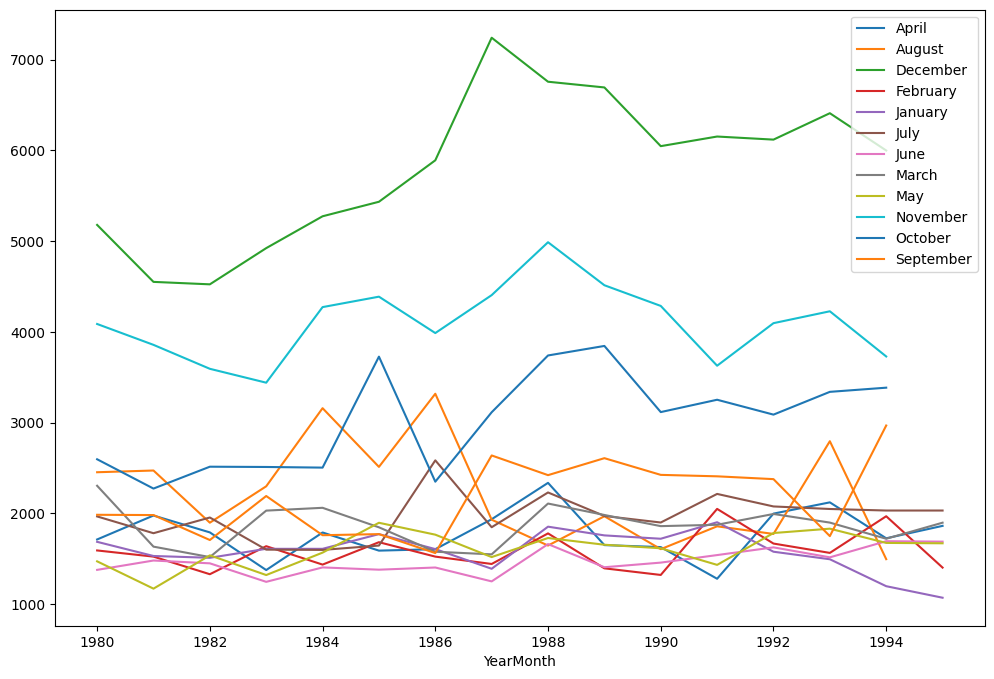

In [ ]:
# Plotting trend of months across years
plt.figure(figsize=(15, 8))
monthly_price_across_years.plot(kind='line')
plt.legend(loc='best')
plt.show()

### Decomposition

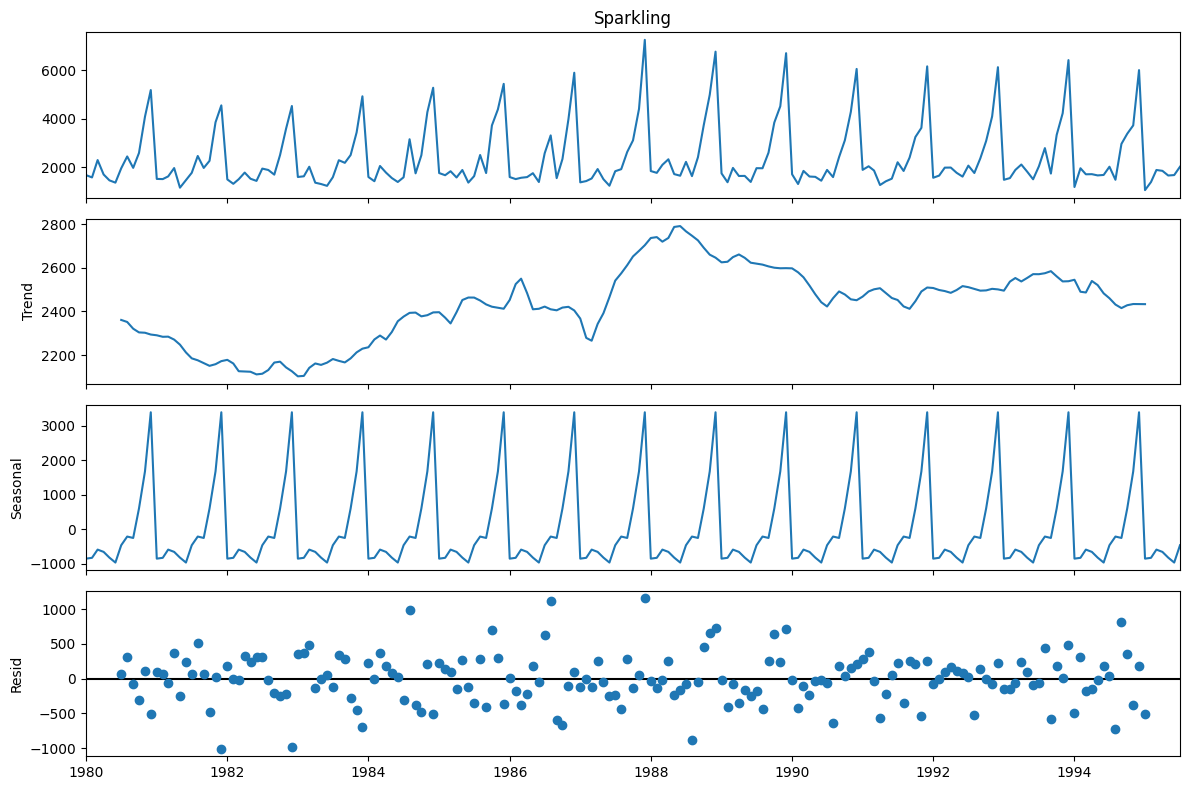

In [ ]:
#Decompose the time series additively
df_mul_decompose = seasonal_decompose(data['Sparkling'], model='additive')
df_mul_decompose.plot()
plt.show()

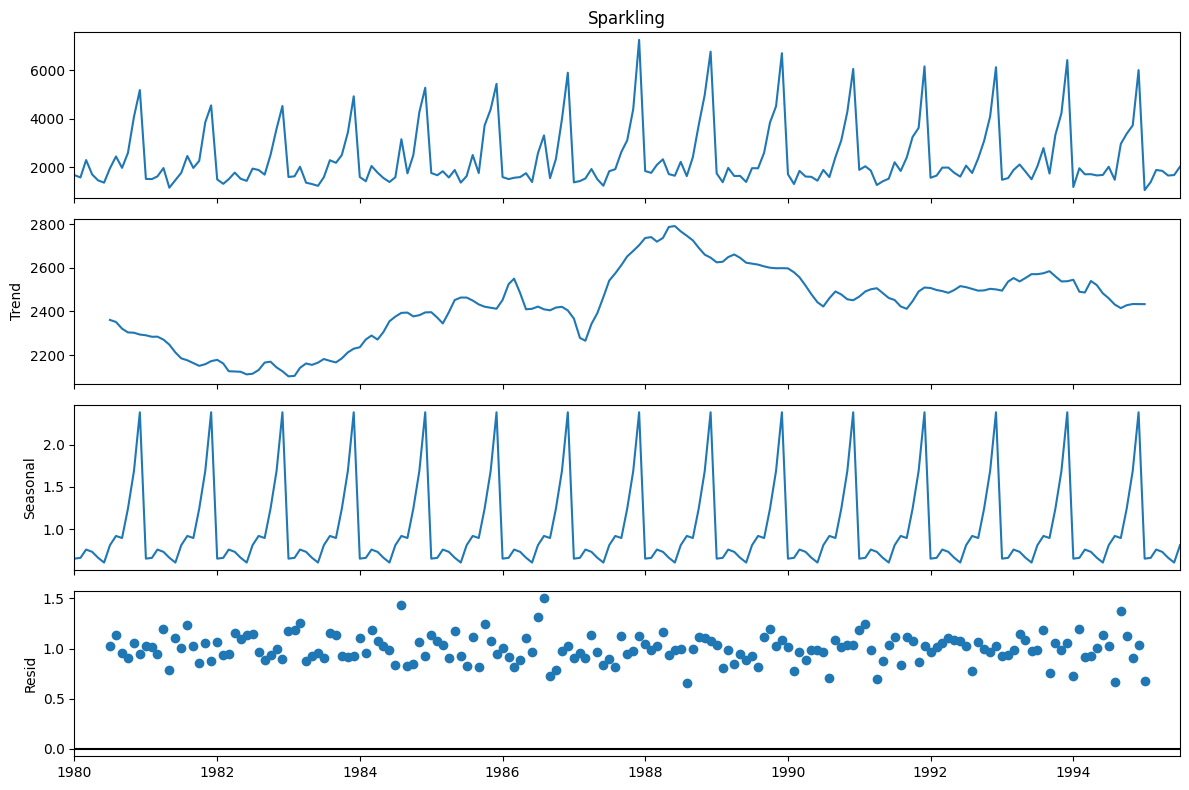

In [ ]:
#Decompose the time series multiplicative
df_mul_decompose = seasonal_decompose(data['Sparkling'], model='multiplicative')
df_mul_decompose.plot()
plt.show()

# Data Pre-Processing

### Split the data into train and test and plot the training and test data.

In [ ]:
# Complete the code to split train set consisting data until 1992 and test set from 1993 onwards
train = data[data.index.year < 1993]
test = data[data.index.year >= 1993]

In [ ]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1992-08-01,1773
1992-09-01,2377
1992-10-01,3088
1992-11-01,4096
1992-12-01,6119


First few rows of Test Data


,Sparkling
YearMonth,
1993-01-01,1494
1993-02-01,1564
1993-03-01,1898
1993-04-01,2121
1993-05-01,1831


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [ ]:
#Complete the code to check the shape of train and test sets
print(train.shape)
print(test.shape)

(156, 1)
(31, 1)


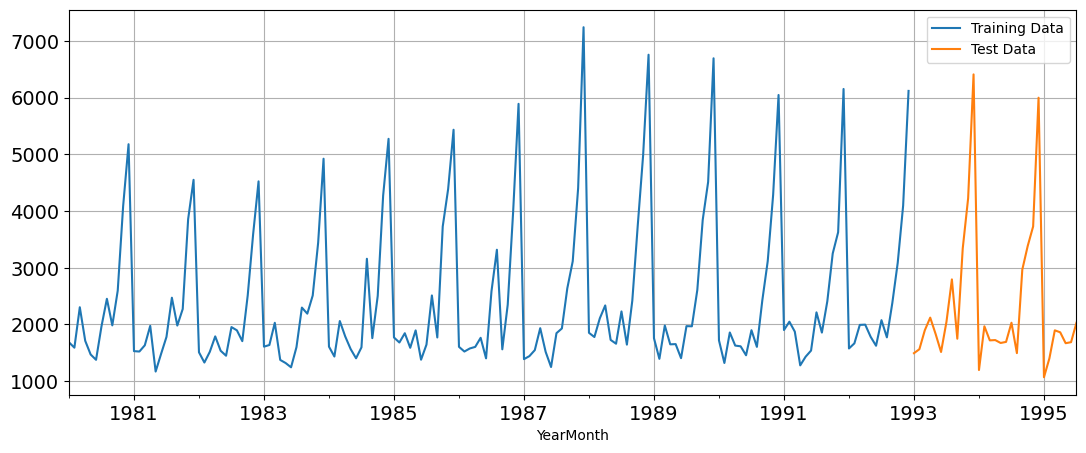

In [ ]:
# Trend of Training and Test Data

train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Model Building - Original Data

### Linear Regression

For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [ ]:
# Generating the numerical time instance order for both the training and test set
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156]
Test Time instance 
 [156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


We see that we have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1992-08-01       1773   152
1992-09-01       2377   153
1992-10-01       3088   154
1992-11-01       4096   155
1992-12-01       6119   156 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1993-01-01       1494   156
1993-02-01       1564   157
1993-03-01       1898   158
1993-04-01       2121   159
1993-05-01       1831   160 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   182
1995-04-01       1862   183
1995-05-01       1670   184
1995-06-01       1688   185
1995-07-01       2031   186 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [ ]:
# Defining the linear regression model

lr = LinearRegression()

In [ ]:
# Fitting the linear regression model

lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [ ]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])  # code to make predictions
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

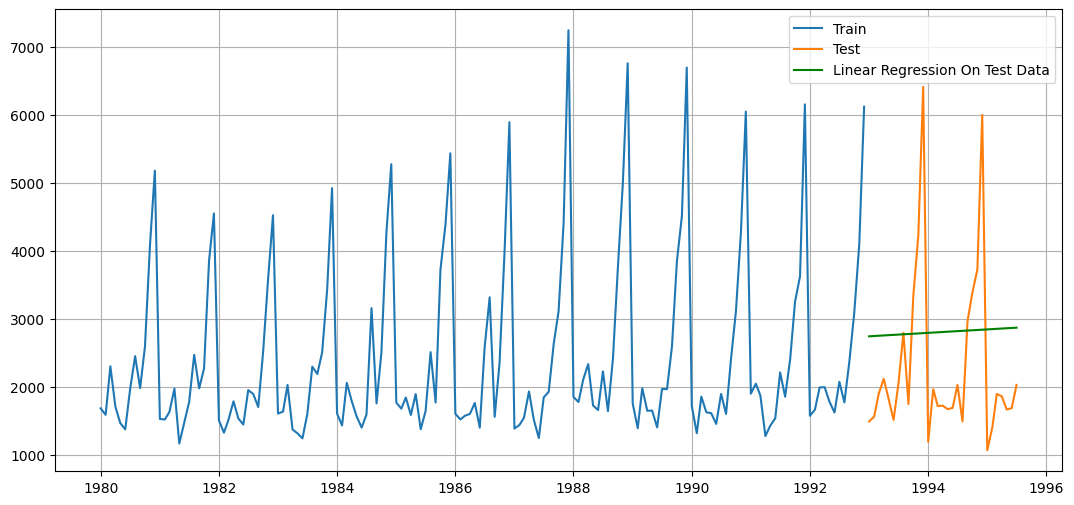

In [ ]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression On Test Data', color = 'green')
plt.legend(loc='best')
plt.grid();

In [ ]:
## Test Data - RMSE

from sklearn import metrics

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1) # Complete the code to find the RMSE on test data
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1803629.59


In [ ]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,1.803630e+06


### Moving Average (MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [ ]:
MovingAverage = data.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [ ]:
# Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean() # 2 point trailing average
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean() # 4 point trailing average
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean() # 6 point trailing average
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean() # 9 point trailing average

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


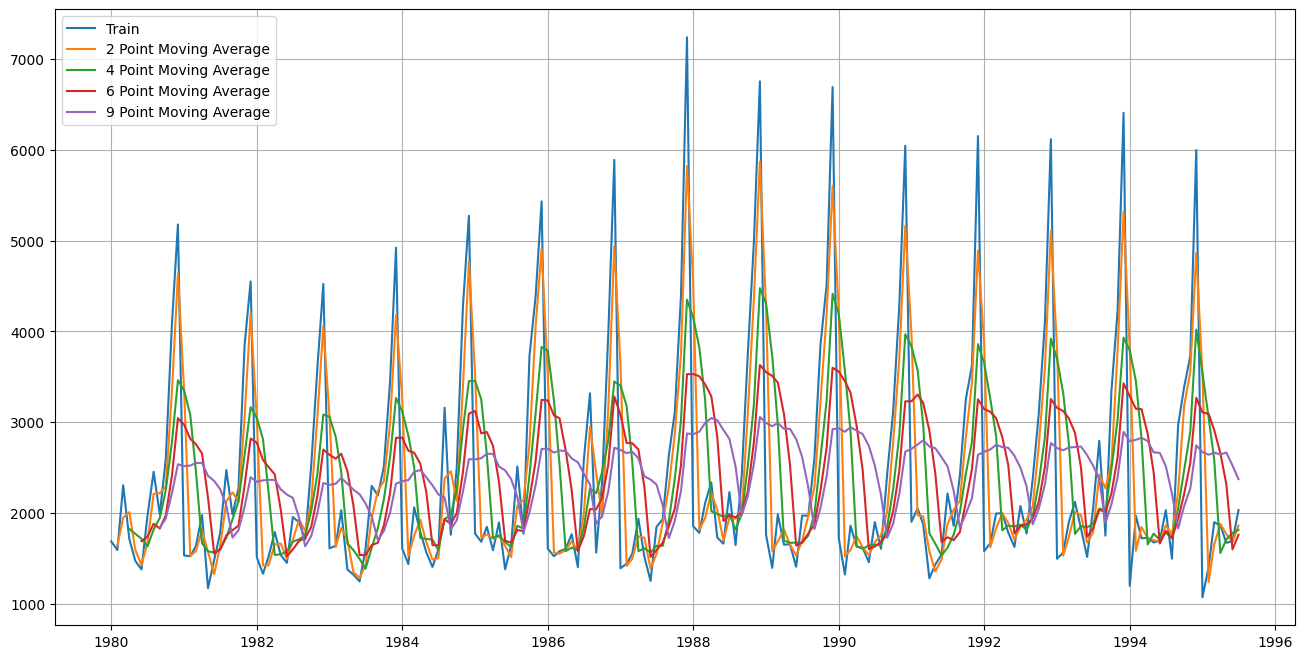

In [ ]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average') # 2 point moving average
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average') # 4 point moving average
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average') # 6 point moving average
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average') # 9 point moving average

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [ ]:
#Creating train and test set
trailing_MovingAverage_train= MovingAverage[MovingAverage.index.year < 1993]
trailing_MovingAverage_test= MovingAverage[MovingAverage.index.year >= 1993]


In [ ]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2']) #Complete the code to find the RMSE for 2 point moving average
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4']) # RMSE for 4 point moving average
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 745291.613
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1418502.194
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1656641.726
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1764540.438


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06


* The 2-point Trailing Moving Average has the lowest RMSE (Root Mean Squared Error) value of 7.45e+05, indicating it performs best among the models tested.
* Linear Regression has the highest RMSE value of 1.80e+06, suggesting it is the least effective model for this time series data.

* As the number of points in the trailing moving average increases (from 2 to 9 points), the RMSE tends to increase. This indicates that shorter window sizes (e.g., 2 points) capture the data's patterns more accurately in this case.

* Simpler models like the 2-point Trailing Moving Average perform better for this dataset, possibly due to the strong seasonal components, while more complex models like Linear Regression fail to capture the underlying time series patterns effectively.

Before we go on to build the various Exponential Smoothing models, let us plot all the best models and compare the Time Series plots.

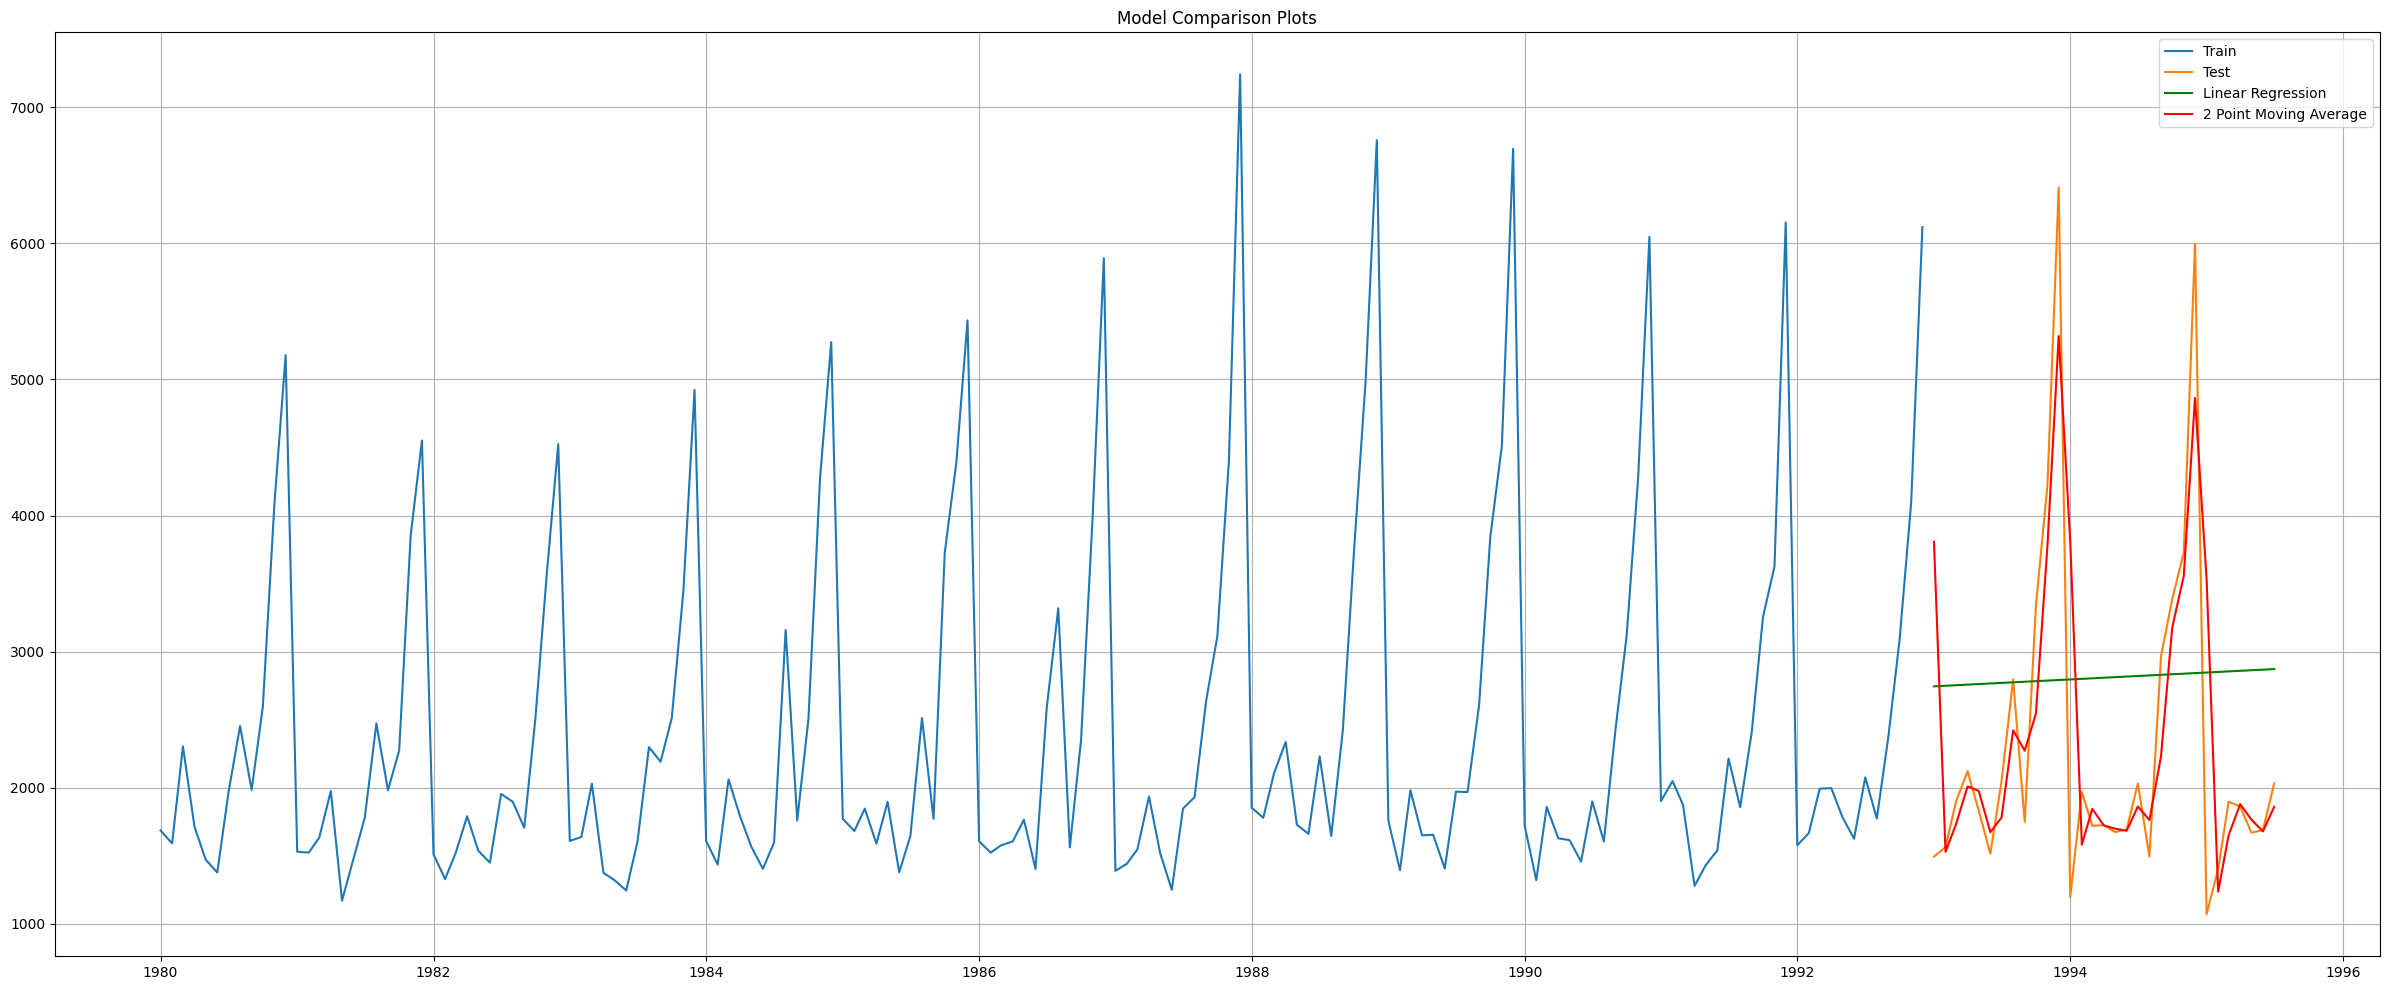

In [ ]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Simple Exponential Smoothening Models

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling']) # Define the simple exponential smoothening model

In [ ]:
# model_SES = '__________________________'(SES_train['_______']) #Define the simple exponential smoothening model

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)   #Fit the simple exponential smoothening model

In [ ]:
# model_SES_autofit = '_______'.'___'(optimized=True)   #Fit the simple exponential smoothening model

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.0351576224169293,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))   #Forecast the model
SES_test.head()

,Sparkling,predict
YearMonth,,
1993-01-01,1494,2632.921331
1993-02-01,1564,2632.921331
1993-03-01,1898,2632.921331
1993-04-01,2121,2632.921331
1993-05-01,1831,2632.921331


In [ ]:
# SES_test['predict'] = '____________________'.'______________'(steps=len(test))   #Forecast the model

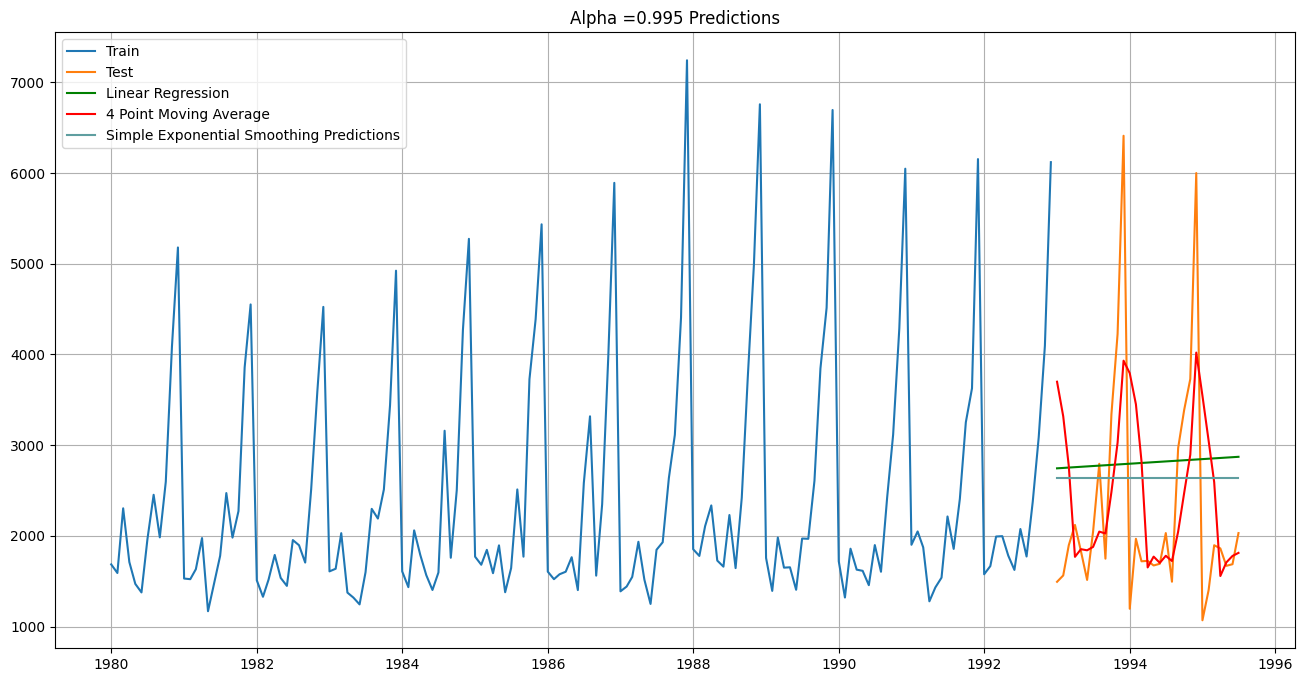

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for  𝛼
  = 0.995 : Simple Exponential Smoothing

In [ ]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model5_test_1 = metrics.mean_squared_error(test['Sparkling'],SES_test['predict'])
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1667686.155


In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06


### Double Exponential Smoothening (Holt's Model)

Two parameters  𝛼
  and  𝛽
  are estimated in this model. Level and Trend are accounted for in this model.

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
# prompt: model_DES = '______________'  #Define the double exponential smoothening model

#model_DES = Holt(DES_train['Sparkling'])  # Define the double exponential smoothing model
model_DES = Holt(DES_train,initialization_method='estimated')

In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [ ]:
# prompt: for i in np.arange(0.3,1.1,0.1):
#     for j in np.arange(0.3,1.1,0.1):
#         model_DES_alpha_i_j = '______'.'______'(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True) #fit the model
#         DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
#         DES_test['predict',i,j] = model_DES_alpha_i_j.'_______'(steps=37)  #Forecast the model
#         rmse_model6_train = '___________'('________________','________________',squared=False) #Find the RMSE on train data
#         rmse_model6_test = '_____________'('_______________','________________',squared=False)    #Find teh RMSE on test data
#         resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
#                                           ,'Test RMSE':rmse_model6_test}, ignore_index=True)

import pandas as pd
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error

for i in np.arange(0.3, 1.1, 0.1):
    for j in np.arange(0.3, 1.1, 0.1):
        model_DES_alpha_i_j = Holt(DES_train['Sparkling'], initialization_method='estimated').fit(smoothing_level=i, smoothing_trend=j, optimized=False, use_brute=True) #fit the model
        DES_train['predict'+str(i)+str(j)] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict'+str(i)+str(j)] = model_DES_alpha_i_j.forecast(steps=37)  #Forecast the model
        rmse_model6_train = mean_squared_error(DES_train['Sparkling'], DES_train['predict'+str(i)+str(j)]) #Find the RMSE on train data
        rmse_model6_test = mean_squared_error(test['Sparkling'],DES_test['predict'+str(i)+str(j)])    #Find teh RMSE on test data
        #resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                         # ,'Test RMSE':rmse_model6_test})

In [ ]:
# Replace the append with pd.concat

resultsDf_7 = pd.concat([resultsDf_7, pd.DataFrame([{'Alpha Values': i, 'Beta Values': j, 'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test}])], ignore_index=True)

In [ ]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,1.0,1.0,4.528685e+06,1.635052e+09


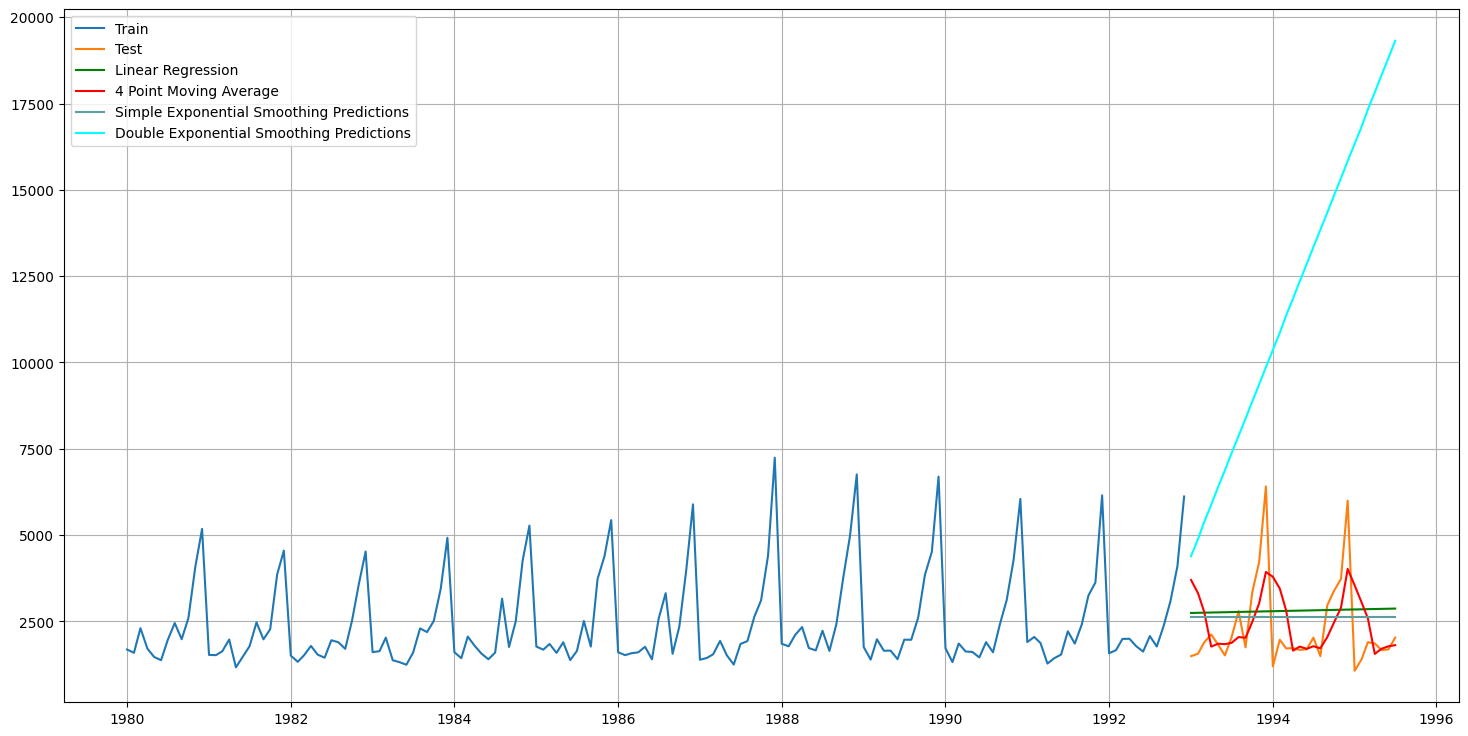

In [ ]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict0.30.3'], label='Double Exponential Smoothing Predictions', color='cyan')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",1.635052e+09


### Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters  𝛼
 ,  𝛽
  and  𝛾
  are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',seasonal_periods=12)  #Define the triple exponential smoothening model

In [ ]:
# model_TES = '_________________'('_____________',trend='___________',seasonal='____________')  #Define the triple exponential smoothening model

In [ ]:
# model_TES_autofit = model_TES."______"   #Fit the triple exponential smoothening model

In [ ]:
model_TES_autofit = model_TES.fit()   #Fit the triple exponential smoothening model

In [ ]:
model_TES_autofit.params

{'smoothing_level': 0.06122185435482575,
 'smoothing_trend': 0.021041249212026766,
 'smoothing_seasonal': 0.46507233097160344,
 'damping_trend': nan,
 'initial_level': 2337.9674342045696,
 'initial_trend': 0.42990295172783466,
 'initial_seasons': array([-679.65893809, -757.00961096, -338.3572848 , -507.91559669,
        -853.33604091, -864.44439871, -398.24969167,  117.54230111,
        -303.75450451,  262.4590108 , 1635.12189352, 2668.76705925]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))  #Forecast thetriple exponential smoothening model
TES_test.head()

,Sparkling,auto_predict
YearMonth,,
1993-01-01,1494,1708.247431
1993-02-01,1564,1704.744899
1993-03-01,1898,1937.416274
1993-04-01,2121,1745.030296
1993-05-01,1831,1646.450481


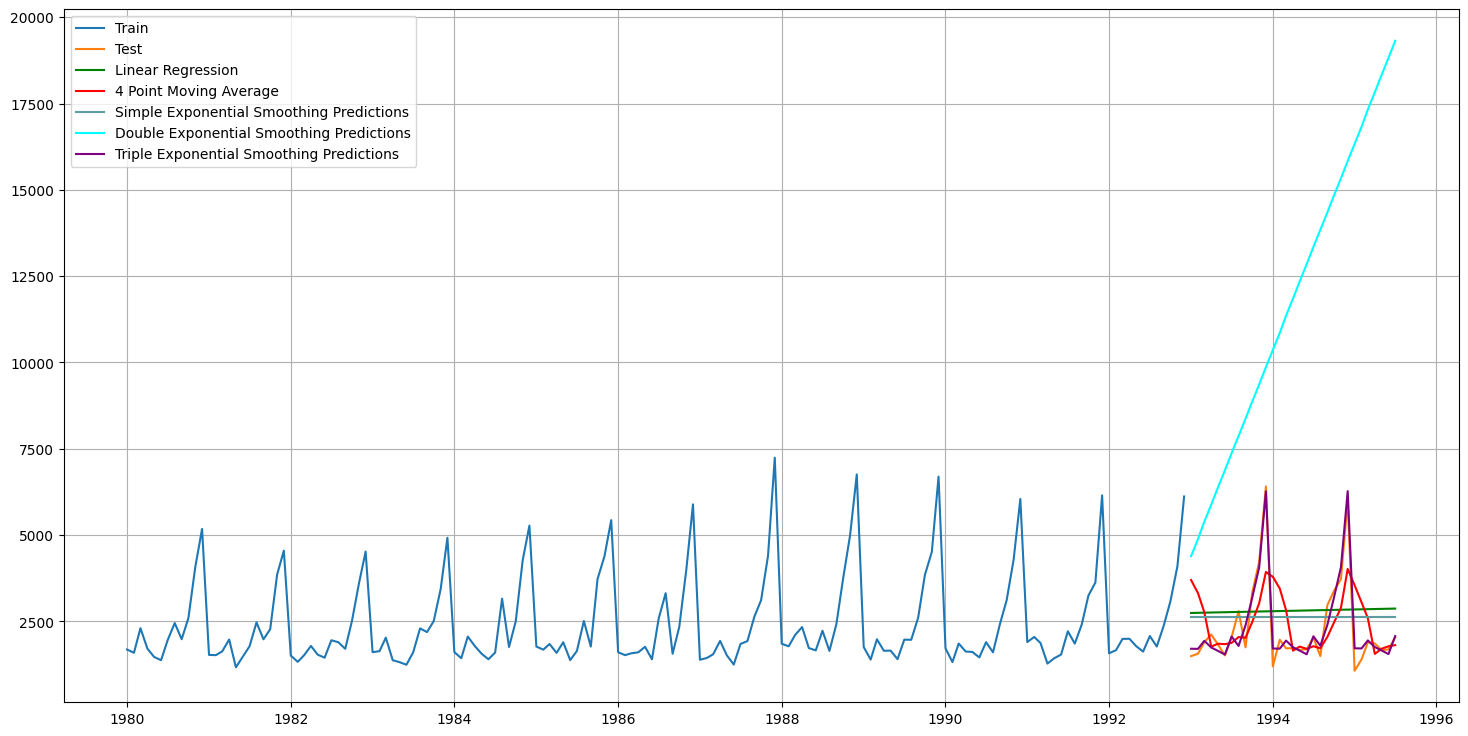

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict0.30.3'], label='Double Exponential Smoothing Predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Triple Exponential Smoothing Predictions', color='purple')


plt.legend(loc='best')
plt.grid();

In [ ]:
# prompt: ## Test Data
# rmse_model6_test_1 = '____________________'(TES_test['________'],TES_test['___________'],squared=False) #Find the RMSE on test data
# print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict']) #Find the RMSE on test data
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 107867.052


In [ ]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",1.635052e+09
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",1.078671e+05


In [ ]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [ ]:
# prompt: for i in np.arange(0.3,1.1,0.1):
#     for j in np.arange(0.3,1.1,0.1):
#         for k in np.arange(0.3,1.1,0.1):
#             model_TES_alpha_i_j_k = model_TES.'_________'('_______','_______','______________',optimized=False,use_brute='___') #Fit the model
#             TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
#             TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.'___________'(steps=37)    #Forecast the model
#             rmse_model8_train = '___________________'(TES_train['____'],TES_train['___________'],squared=False) #Find the RMSE on train data
#             rmse_model8_test = '_______________'(TES_test['_______'],TES_test['___________'],squared=False) #Find the RMSE on test data
#             resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
#                                                  , ignore_index=True)

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_trend=j, smoothing_seasonal=k, optimized=False, use_brute=True) #Fit the model
            TES_train[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=37)    #Forecast the model
            rmse_model8_train = mean_squared_error(TES_train['Sparkling'],TES_train[f'predict_{i}_{j}_{k}']) #Find the RMSE on train data
            rmse_model8_test = mean_squared_error(TES_test['Sparkling'],TES_test[f'predict_{i}_{j}_{k}']) #Find the RMSE on test data
            resultsDf_8_2 = pd.concat([resultsDf_8_2, pd.DataFrame([{'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}])], ignore_index=True)

In [ ]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
7,0.3,0.3,1.0,280159.008455,142201.934840
192,0.6,0.3,0.3,249489.485078,324768.919958
136,0.5,0.4,0.3,277073.133920,466560.112438
257,0.7,0.3,0.4,274949.508734,491458.509881
3,0.3,0.3,0.6,218017.595632,526896.017059


In [ ]:
list(TES_test.columns)

['Sparkling',
 'auto_predict',
 'predict_0.3_0.3_0.3',
 'predict_0.3_0.3_0.4',
 'predict_0.3_0.3_0.5',
 'predict_0.3_0.3_0.6000000000000001',
 'predict_0.3_0.3_0.7000000000000002',
 'predict_0.3_0.3_0.8000000000000003',
 'predict_0.3_0.3_0.9000000000000001',
 'predict_0.3_0.3_1.0000000000000002',
 'predict_0.3_0.4_0.3',
 'predict_0.3_0.4_0.4',
 'predict_0.3_0.4_0.5',
 'predict_0.3_0.4_0.6000000000000001',
 'predict_0.3_0.4_0.7000000000000002',
 'predict_0.3_0.4_0.8000000000000003',
 'predict_0.3_0.4_0.9000000000000001',
 'predict_0.3_0.4_1.0000000000000002',
 'predict_0.3_0.5_0.3',
 'predict_0.3_0.5_0.4',
 'predict_0.3_0.5_0.5',
 'predict_0.3_0.5_0.6000000000000001',
 'predict_0.3_0.5_0.7000000000000002',
 'predict_0.3_0.5_0.8000000000000003',
 'predict_0.3_0.5_0.9000000000000001',
 'predict_0.3_0.5_1.0000000000000002',
 'predict_0.3_0.6000000000000001_0.3',
 'predict_0.3_0.6000000000000001_0.4',
 'predict_0.3_0.6000000000000001_0.5',
 'predict_0.3_0.6000000000000001_0.6000000000000001

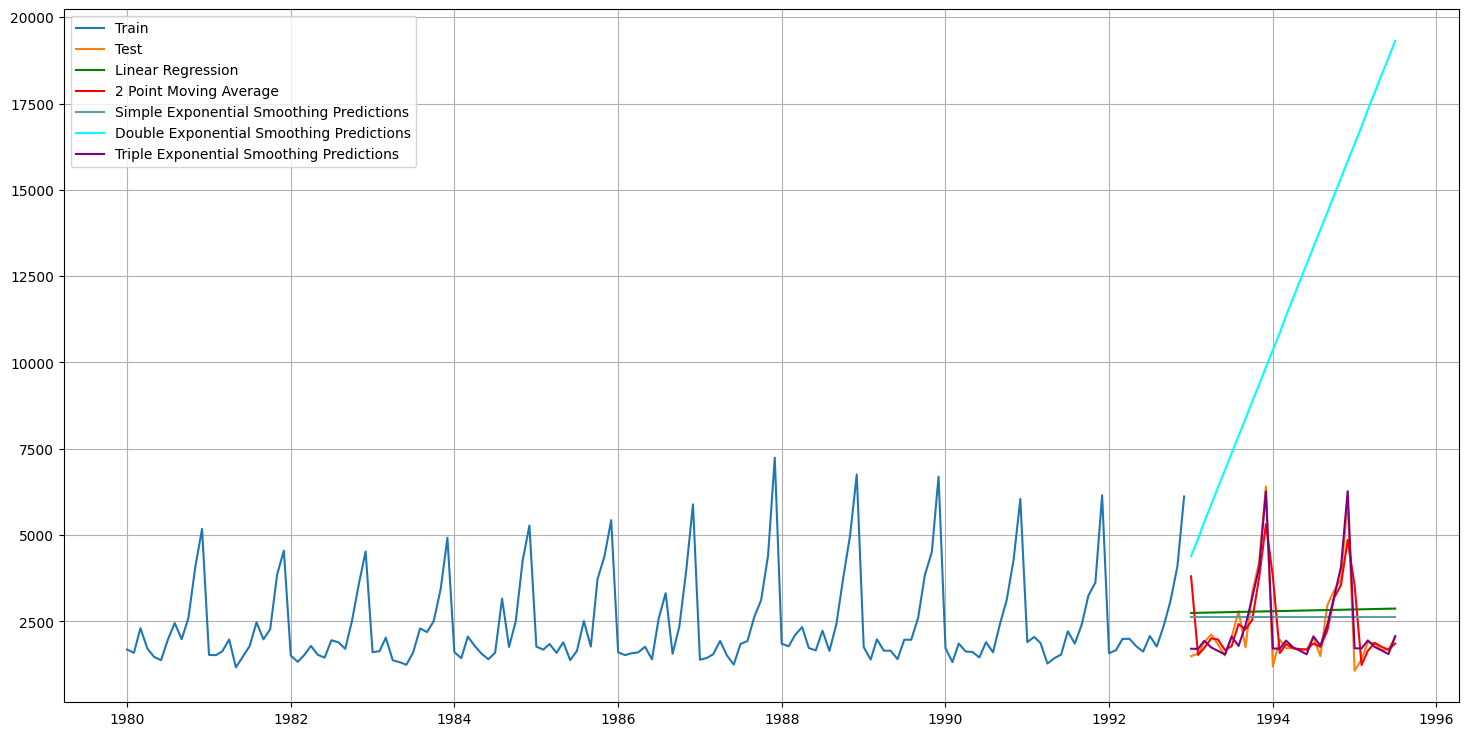

In [ ]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')


# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict0.30.3'], label='Double Exponential Smoothing Predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Triple Exponential Smoothing Predictions', color='purple')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing'])

results_Df = pd.concat([resultsDf, resultsDf_8_3])
results_Df

,Test RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",1.635052e+09
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",1.078671e+05
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",1.422019e+05


In [ ]:
print('Sorted by RMSE values on the Test Data:','\n',)
results_Df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",1.078671e+05
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",1.422019e+05
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06
9pointTrailingMovingAverage,1.764540e+06
Linear Regression,1.803630e+06
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",1.635052e+09


# Check for stationarity of the whole Time Series data.

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

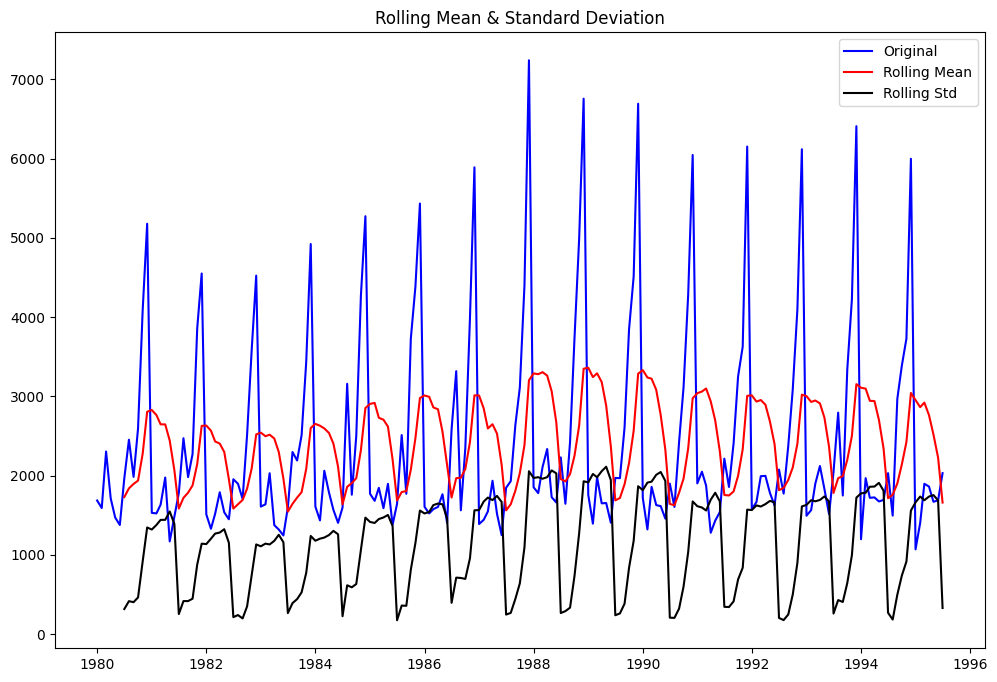

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [ ]:
# prompt: test_stationarity('____________')     #Complete the code to test stationarity on the data

test_stationarity(data['Sparkling'])

In [ ]:
# test_stationarity('____________')     #Complete the code to test stationarity on the data

In [ ]:
# test_stationarity('_______________________')  #Complete the code to perform differencing on train data

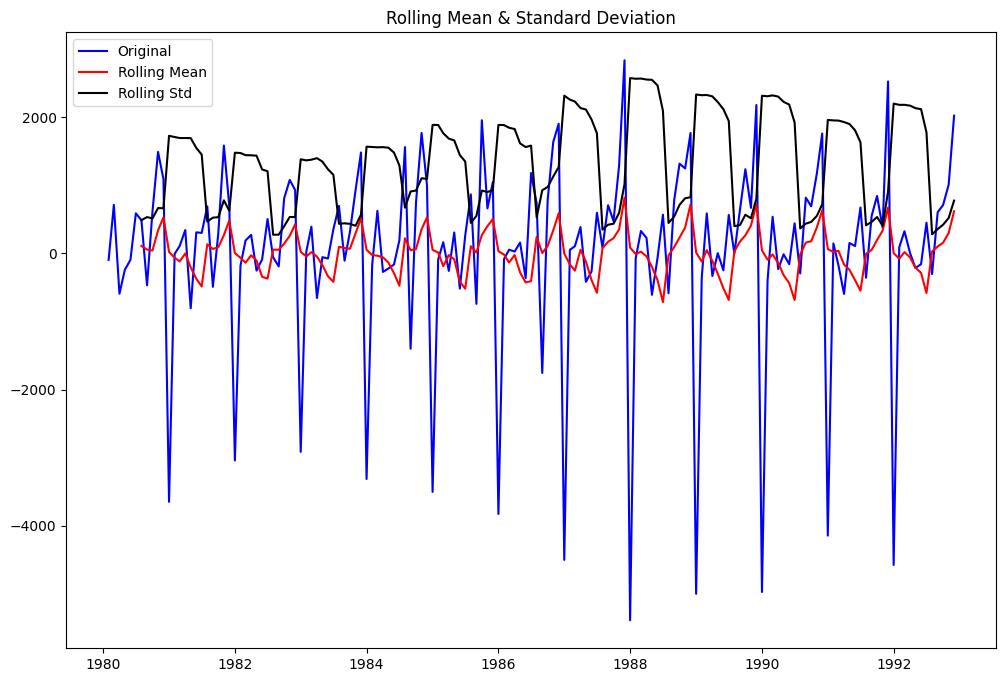

Results of Dickey-Fuller Test:
Test Statistic                -9.035900e+00
p-value                        5.290544e-15
#Lags Used                     1.100000e+01
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64 



In [ ]:
# prompt: test_stationarity('_______________________')  #Complete the code to perform differencing on train data

# Assuming 'data' and 'train' are defined in the preceding code.
# The original code has a placeholder for the differencing operation.

# Perform differencing on train data
train['Sparkling_diff'] = train['Sparkling'] - train['Sparkling'].shift(1)
train.dropna(inplace=True)  # Remove the first row with NaN due to differencing

test_stationarity(train['Sparkling_diff'])

# Model Building - Stationary Data

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

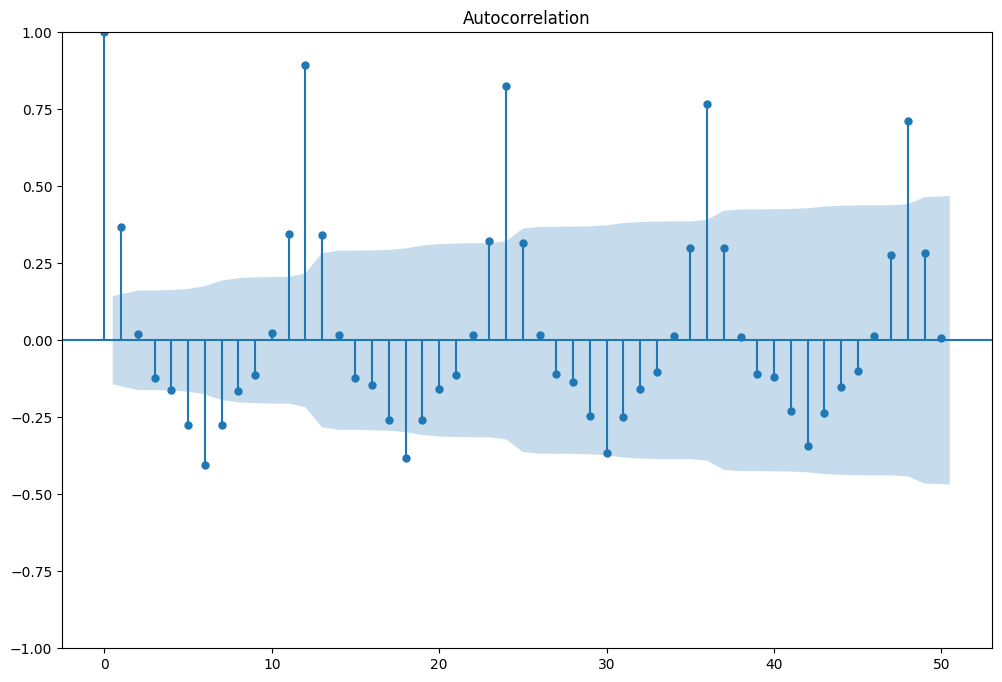

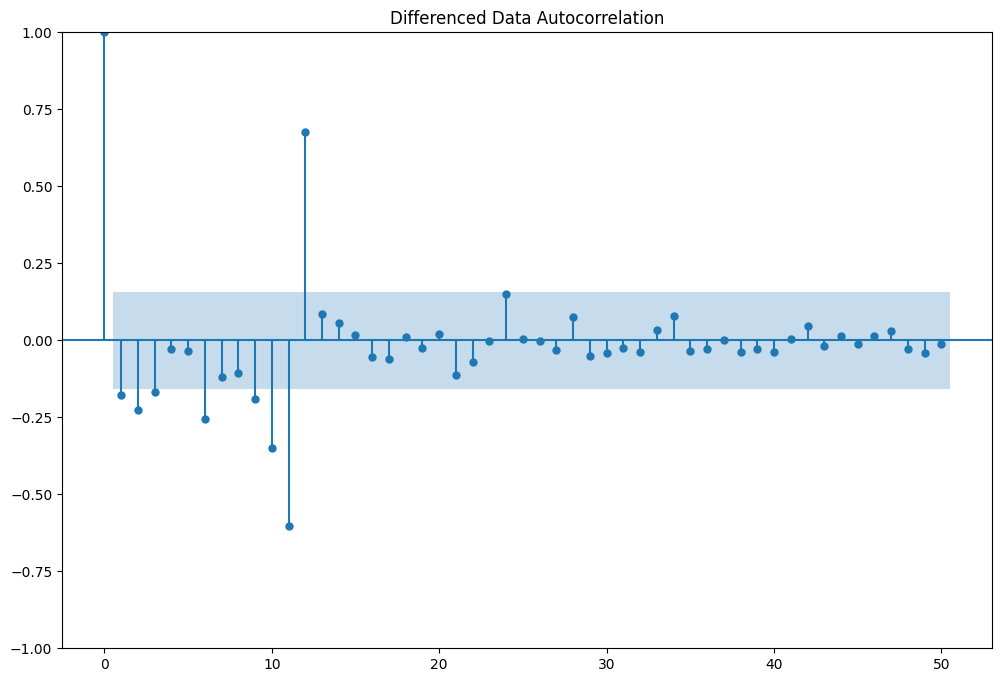

In [ ]:
# prompt: '_______'('________',lags=50) #Complete the code to plot ACF plot
# '_______'('___________',lags=50,title='Differenced Data Autocorrelation')  #Complete the code to plot PACF plot
# plt.show()

plot_acf(data['Sparkling'],lags=50)
plot_pacf(train['Sparkling_diff'],lags=50,title='Differenced Data Autocorrelation')
plt.show()

### Auto ARIMA Model

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= [1] #complete the code to ensure stationarity
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
# d = [1] #complete the code to ensure stationarity

In [ ]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'], order=param).fit()  #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))   #Complete the code to find the AIC values
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:2670.339122993466
ARIMA(0, 1, 1) - AIC:2662.800416596946
ARIMA(0, 1, 2) - AIC:2628.315772757087
ARIMA(1, 1, 0) - AIC:2667.584975491526
ARIMA(1, 1, 1) - AIC:2629.4309663768854
ARIMA(1, 1, 2) - AIC:2628.676384468757
ARIMA(2, 1, 0) - AIC:2661.094386169021
ARIMA(2, 1, 1) - AIC:2627.7762948399522
ARIMA(2, 1, 2) - AIC:2608.552459374075


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2608.552459
7,"(2, 1, 1)",2627.776295
2,"(0, 1, 2)",2628.315773
5,"(1, 1, 2)",2628.676384
4,"(1, 1, 1)",2629.430966
6,"(2, 1, 0)",2661.094386
1,"(0, 1, 1)",2662.800417
3,"(1, 1, 0)",2667.584975
0,"(0, 1, 0)",2670.339123


In [ ]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))  #Build the ARIMA model based on the best AIC values

results_auto_ARIMA = auto_ARIMA.fit()  #Fit the auto ARIMA model
print(results_auto_ARIMA.summary())   #Print the summary result

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  155
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1299.276
Date:                Sun, 05 Jan 2025   AIC                           2608.552
Time:                        17:35:23   BIC                           2623.737
Sample:                    02-01-1980   HQIC                          2614.720
                         - 12-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3130      0.043     30.798      0.000       1.229       1.397
ar.L2         -0.5389      0.060     -9.032      0.000      -0.656      -0.422
ma.L1         -1.9887      0.105    -18.882      0.0

Predict on the Test Set using this model and evaluate the model.

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))  #Forecast using the auto ARIMA
predicted_auto_ARIMA

,predicted_mean
1993-01-01,3574.078455
1993-02-01,1928.794357
1993-03-01,1139.924827
1993-04-01,990.731128
1993-05-01,1219.931408
1993-06-01,1601.260038
1993-07-01,1978.429242
1993-08-01,2268.161754
1993-09-01,2445.333302
1993-10-01,2521.830874


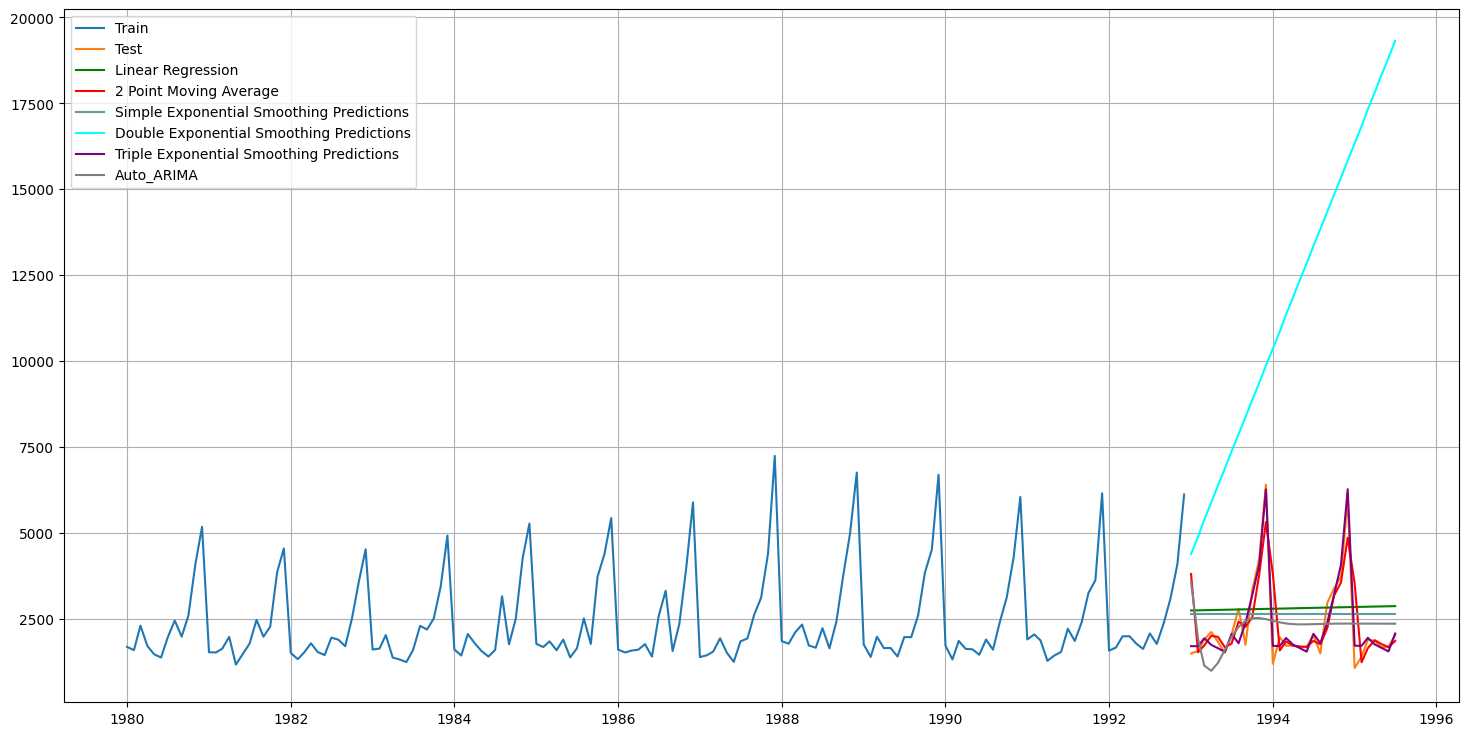

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict0.30.3'], label='Double Exponential Smoothing Predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Triple Exponential Smoothing Predictions', color='purple')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();

In [ ]:
rmse = mean_squared_error(test['Sparkling'], predicted_auto_ARIMA)  #Find the RMSE on test data
rmse

1652180.704514092

In [ ]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}, index=['Auto_ARIMA'])
resultsDf

,RMSE
Auto_ARIMA,1.652181e+06


### ARIMA Model

In [ ]:
# prompt: import itertools
# p = '_____'  #Define the range of AR values based on the ACF & PACF plots
# q ='____'   #Define the range of AR values based on the ACF & PACF plots
# d= '____'   #Define the value to make the data stationary

p = range(0, 3)
q = range(0, 3)
d = [1]
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling_diff'], order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA_AIC.sort_values(by='AIC', ascending=True)

auto_ARIMA = ARIMA(train['Sparkling_diff'], order=(1,1,1))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

predicted_auto_ARIMA = results_auto_ARIMA.predict(start=len(train), end=len(train)+len(test)-1)

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
ARIMA(0, 1, 0) - AIC:2801.198981016615
ARIMA(0, 1, 1) - AIC:2676.8195202259885
ARIMA(0, 1, 2) - AIC:2669.576661533585
ARIMA(1, 1, 0) - AIC:2759.9877599032607
ARIMA(1, 1, 1) - AIC:2674.0721737204103
ARIMA(1, 1, 2) - AIC:2639.6777086661596
ARIMA(2, 1, 0) - AIC:2735.7146174144673
ARIMA(2, 1, 1) - AIC:2668.067318262088
ARIMA(2, 1, 2) - AIC:2636.6213951760737
                               SARIMAX Results                                
Dep. Variable:         Sparkling_diff   No. Observations:                  155
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1334.036
Date:                Sun, 05 Jan 2025   AIC                           2674.072
Time:                        17:35:27   BIC                           2683.183
Sample:                    02-01-1980   HQIC                       

In [ ]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = range(0, 3)  #Define the range of AR values based on the ACF & PACF plots
q = range(0, 3)   #Define the range of AR values based on the ACF & PACF plots
d= [1]   #Define the value to make the data stationary
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling_diff'], order=param).fit() #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))  #Complete the code to find teh AIC values
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:2801.198981016615
ARIMA(0, 1, 1) - AIC:2676.8195202259885
ARIMA(0, 1, 2) - AIC:2669.576661533585
ARIMA(1, 1, 0) - AIC:2759.9877599032607
ARIMA(1, 1, 1) - AIC:2674.0721737204103
ARIMA(1, 1, 2) - AIC:2639.6777086661596
ARIMA(2, 1, 0) - AIC:2735.7146174144673
ARIMA(2, 1, 1) - AIC:2668.067318262088
ARIMA(2, 1, 2) - AIC:2636.6213951760737


In [ ]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2636.621395
17,"(2, 1, 2)",2636.621395
5,"(1, 1, 2)",2639.677709
14,"(1, 1, 2)",2639.677709
7,"(2, 1, 1)",2668.067318
16,"(2, 1, 1)",2668.067318
2,"(0, 1, 2)",2669.576662
11,"(0, 1, 2)",2669.576662
4,"(1, 1, 1)",2674.072174
13,"(1, 1, 1)",2674.072174


In [ ]:
ARIMA_model1 = ARIMA(train['Sparkling'], order=((2,1,2)))   #Build the ARIMA model based on the best params

results_ARIMA = ARIMA_model1.fit()  #Fit the ARIMA model

print(results_ARIMA.summary())  #Print the summary result

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  155
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1299.276
Date:                Sun, 05 Jan 2025   AIC                           2608.552
Time:                        17:35:32   BIC                           2623.737
Sample:                    02-01-1980   HQIC                          2614.720
                         - 12-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3130      0.043     30.798      0.000       1.229       1.397
ar.L2         -0.5389      0.060     -9.032      0.000      -0.656      -0.422
ma.L1         -1.9887      0.105    -18.882      0.0

In [ ]:
predicted_ARIMA = results_ARIMA.predict(steps=len(test))  #Forecast the ARIMA model
predicted_ARIMA

,predicted_mean
1980-02-01,0.000000
1980-03-01,1426.164736
1980-04-01,1979.202191
1980-05-01,1475.565468
1980-06-01,1317.744389
...,...
1992-08-01,2753.841378
1992-09-01,2680.812620
1992-10-01,2966.432494
1992-11-01,3155.692371


In [ ]:
rmse1= mean_squared_error(test['Sparkling'], predicted_ARIMA) #Find the RMSE on test data
rmse1

1652180.704514092

In [ ]:
predicted_ARIMA = results_ARIMA.predict(start=test.index[0], end=test.index[-1])  # Forecast using the ARIMA model

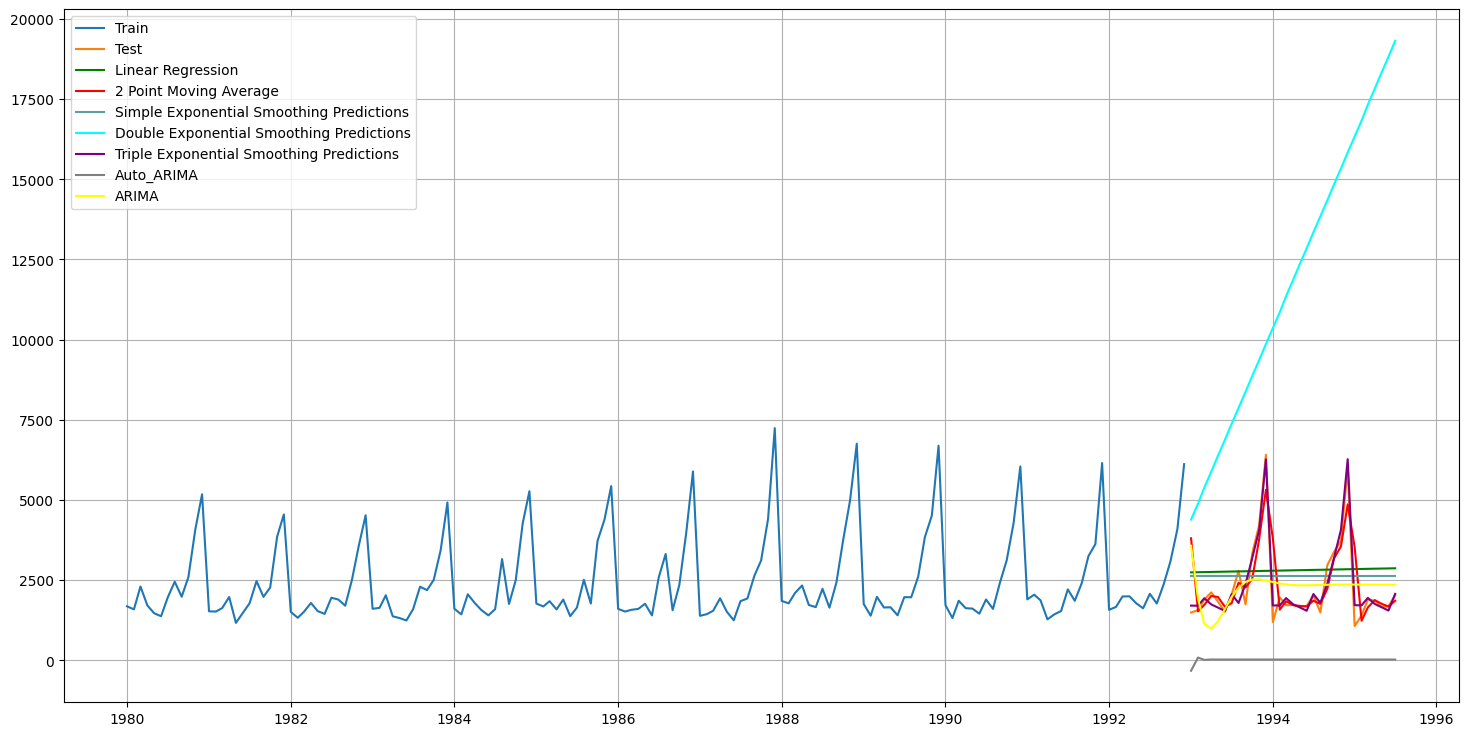

In [ ]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')


# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing Predictions', color='cadetblue')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict0.30.3'], label='Double Exponential Smoothing Predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['auto_predict'], label='Triple Exponential Smoothing Predictions', color='purple')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

plt.plot(predicted_ARIMA, label='ARIMA', color='yellow')

plt.legend(loc='best')
plt.grid();

In [ ]:
# prompt: temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
#                            ,index=['_________'])
# resultsDf= pd.concat([resultsDf,temp_resultsDf])
# resultsDf

temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA'])
resultsDf= pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
Auto_ARIMA,1.652181e+06
ARIMA,1.652181e+06


In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['_________'])


resultsDf= pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
Auto_ARIMA,1.652181e+06
ARIMA,1.652181e+06
_________,1.652181e+06


In [ ]:
results_Df

,Test RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06
"Alpha=0.9,Beta=0.3,DoubleExponentialSmoothing",1.635052e+09
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",1.078671e+05
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",1.422019e+05


# Compare the Performance of the model & Forecast

In [ ]:
results_Df.rename(columns={'Test RMSE':'RMSE'},inplace=True)
result = pd.concat([results_Df, resultsDf])
result.sort_values(by='RMSE')
result

,RMSE
Linear Regression,1.803630e+06
2pointTrailingMovingAverage,7.452916e+05
4pointTrailingMovingAverage,1.418502e+06
6pointTrailingMovingAverage,1.656642e+06
9pointTrailingMovingAverage,1.764540e+06
"Alpha=0.995,SimpleExponentialSmoothing",1.667686e+06
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",1.078671e+05
"Alpha=0.8,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",1.422019e+05
Auto_ARIMA,6.907845e+06
Auto_ARIMA,6.907845e+06


Linear Regression has the highest RMSE value of 1.80e+06, suggesting it is the least effective model for this time series data.

2-point Trailing Moving Average has the lowest RMSE of 745,291.6, making it the most accurate model for this dataset.

Linear Regression has a significantly higher RMSE of 1,803,630, indicating that it is less accurate compared to moving average models.

Among the other moving average models:

•	4-point Trailing Moving Average (RMSE: 1,418,502) is the second-best moving average model.
•	6-point and 9-point Trailing Moving Averages have higher RMSE values (1,656,642 and 1,764,542, respectively), showing decreasing accuracy as the number of points increases.

Simple Exponential Smoothing (Alpha = 0.995) has an RMSE of 1,667,686, which is better than linear regression but worse than moving averages.

Double Exponential Smoothing (Alpha = 0.9, Beta = 0.3) performs poorly, with an extremely high RMSE of 1,635,052,000, making it unsuitable for this dataset.

Triple Exponential Smoothing:
•	Model with Alpha = 0.676, Beta = 0.088, Gamma = 0.323 has a low RMSE of 1,078,671, making it the second-best model overall.
•	Model with Alpha = 0.8, Beta = 0.5, Gamma = 0.5 has an RMSE of 1,422,019, which is moderately accurate but not as effective as the 2-point Trailing Moving Average.


In [ ]:
#Build the best model after comparing all the RMSE values


# Plot the original data and the predictions of best model
plt.plot(df['Price'], label='Original Data')
plt.plot(test['Price'], label='Test Data')
plt.plot('__________________' label='_____________', linestyle='--')  #complete the code to plot the best model
plt.legend()
plt.title('______________') #Give a title to the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

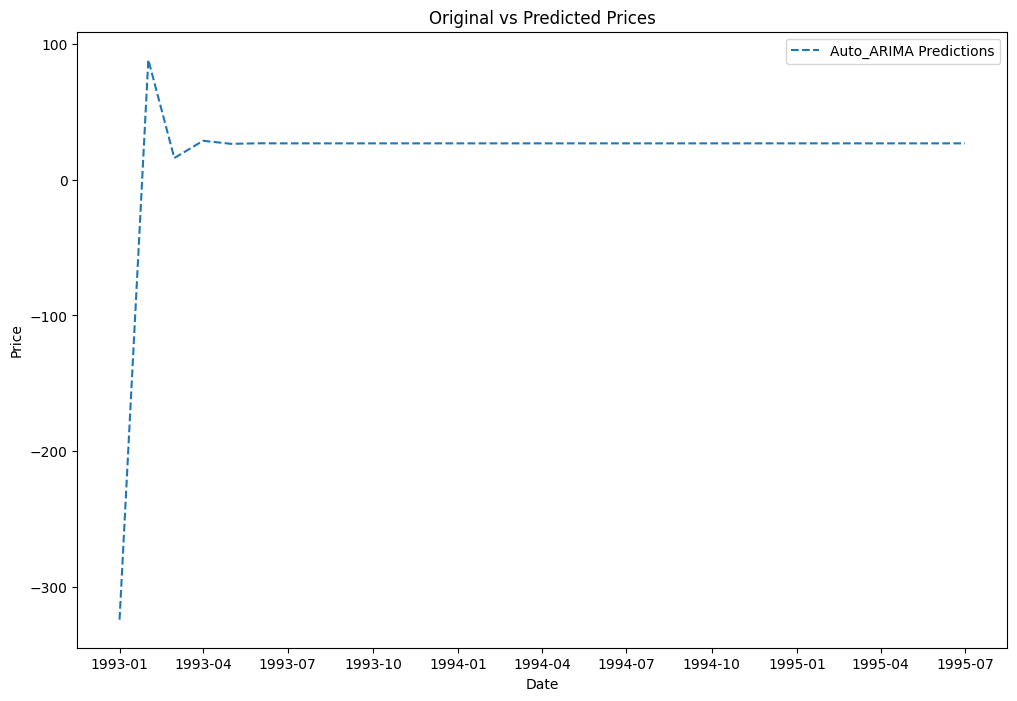

In [ ]:
# prompt: # Plot the original data and the predictions of best model
# plt.plot(df['Price'], label='Original Data')
# plt.plot(test['Price'], label='Test Data')
# plt.plot('__________________' label='_____________', linestyle='--')  #complete the code to plot the best model
# plt.legend()
# plt.title('______________') #Give a title to the plot
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA Predictions', linestyle='--')  #complete the code to plot the best model
plt.legend()
plt.title('Original vs Predicted Prices') #Give a title to the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# prompt: model_TES = '______________'('______________________') # Complete the code to build the best model to forecast
# model_TES_alpha_i_j_k = model_TES.fit('____________________________') # Complete the code to fit the model
# predicted_results_final = model_TES_alpha_i_j_k.forecast(steps='___') # Complete the code to forecast for the next 12 months

model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive',seasonal_periods=12)
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k)
predicted_results_final = model_TES_alpha_i_j_k.forecast(steps=12)

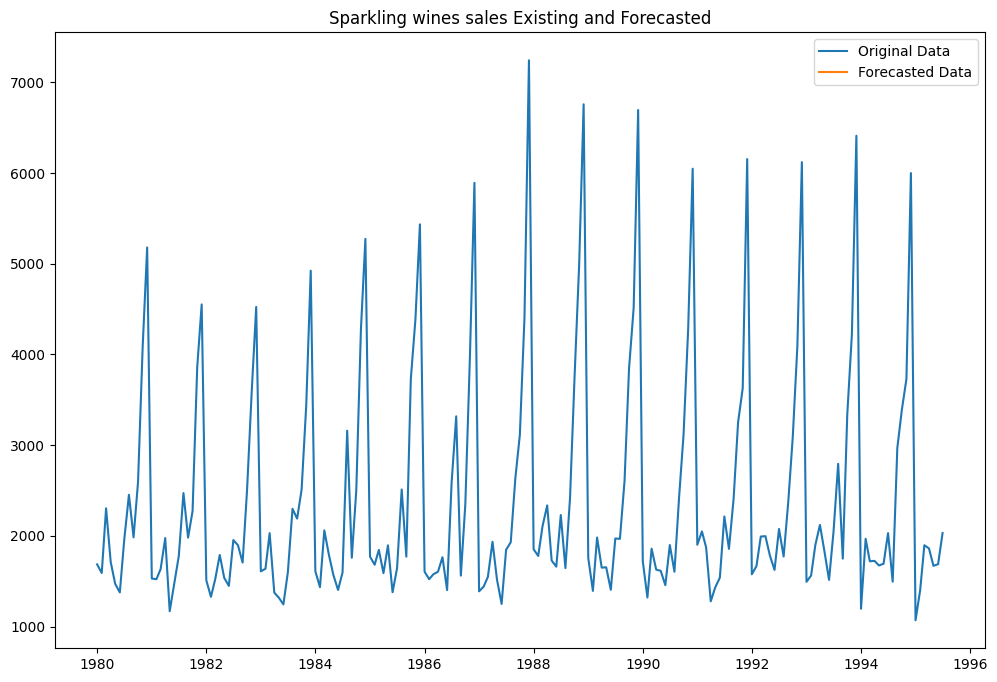

In [ ]:
# model_TES = '______________'('______________________') # Complete the code to build the best model to forecast

# model_TES_alpha_i_j_k = model_TES.fit('____________________________') # Complete the code to fit the model

# predicted_results_final = model_TES_alpha_i_j_k.forecast(steps='___') # Complete the code to forecast for the next 12 months

plt.plot(df['Sparkling'], label = 'Original Data')
plt.plot(predicted_results_final, label = 'Forecasted Data')
plt.legend(loc ='best')
plt.title('Sparkling wines sales Existing and Forecasted');

# Business Recommendations & Insights

•	The 2-point Trailing Moving Average is the best model based on its lowest RMSE value of 745,291.6, indicating superior accuracy for forecasting or prediction tasks on this dataset.

•	Utilize the observed seasonal patterns to design targeted marketing campaigns during peak sales months, such as holidays and festive seasons.

•	Align inventory planning with forecasted seasonal demand to avoid stockouts during peak periods and minimize holding costs during off-peak months.

•	Focus on digital marketing and social media promotions to attract younger demographics and expand customer reach beyond traditional sales channels.


# Conclusion

The analysis of the Sparkling wine dataset indicates significant seasonal trends and periodic fluctuations in sales volumes. Peaks in sales correspond to specific times of the year, likely driven by holidays or celebrations. The decomposition analysis highlights a strong seasonal component, emphasizing the need for inventory and marketing strategies that align with peak demand periods. Forecasting models predict continued growth with sustained seasonal patterns, offering opportunities for strategic promotions and supply chain optimization. Recommendations include leveraging data-driven insights to target marketing campaigns, ensuring stock availability during high-demand periods, and exploring market expansion opportunities to capitalize on consistent growth trends